In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Users\\kimtp\\anaconda3\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [6]:
(train_images, train_labels), (test_image, test_labels) = fashion_mnist.load_data()

In [7]:
class_name = ['T-shirst/top', 'Trouser','Pullover','Dress','Coat',
              'Sandal','Shirst','Sneakers','Bag','Ankle Boots']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
train_labels.shape

(60000,)

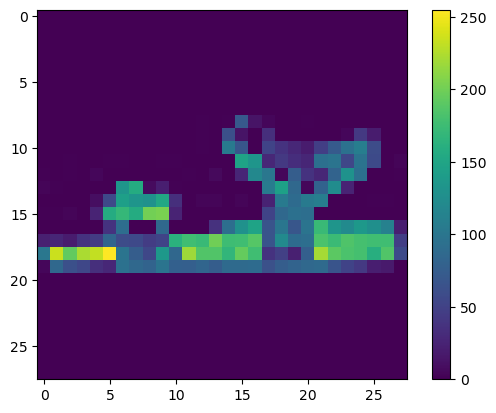

In [11]:
plt.figure()
plt.imshow(train_images[59999])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_image = test_image / 255.0

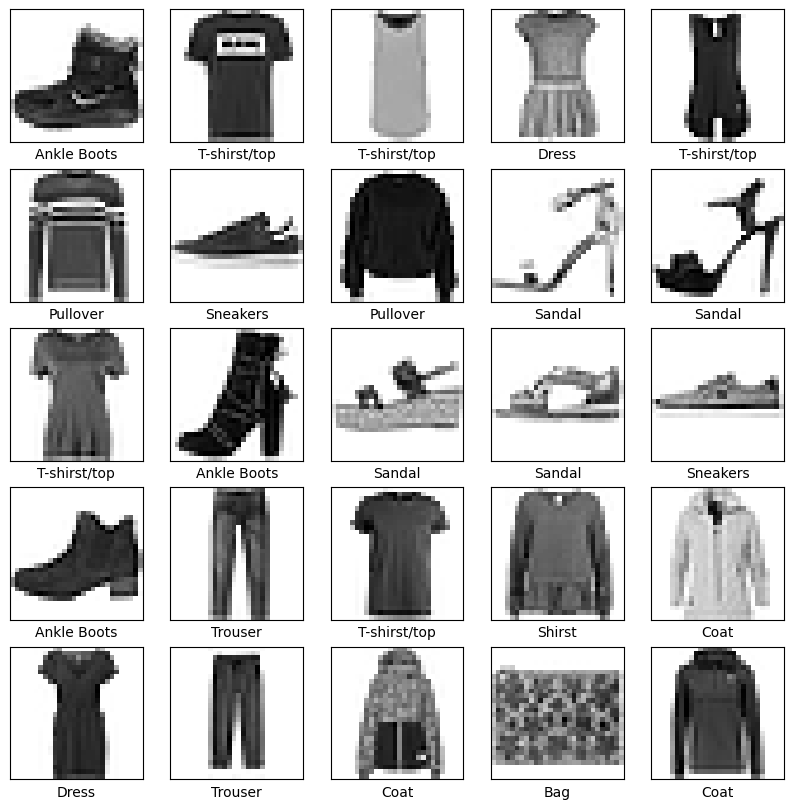

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=5)
## loss 가 점점 더떨어져야지 accuracy 가올라간다 

Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.5002 - accuracy: 0.8254
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3735 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3362 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3123 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2950 - accuracy: 0.8913


In [17]:
test_loss, test_acc = model.evaluate(test_image, test_labels, verbose=2)
print('정확도 : ', test_acc)

313/313 - 0s - loss: 0.3531 - accuracy: 0.8726 - 426ms/epoch - 1ms/step
정확도 :  0.8726000189781189


In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [19]:
predictions = model.predict(test_image)

313/313 [==============================] - 0s 1ms/step


In [20]:
predictions

array([[2.4632568e-06, 1.3198232e-07, 1.0035677e-07, ..., 1.6959281e-01,
        1.1635989e-04, 8.2812995e-01],
       [2.8904067e-05, 3.4431089e-12, 9.9701309e-01, ..., 7.5598693e-14,
        2.2932674e-09, 1.7262319e-13],
       [2.7452522e-06, 9.9999583e-01, 2.1318196e-09, ..., 4.4612341e-16,
        3.4917406e-11, 1.4565919e-13],
       ...,
       [1.1014611e-03, 2.3598299e-09, 3.3408633e-04, ..., 9.7210226e-08,
        9.9760062e-01, 3.0795564e-11],
       [1.6992594e-06, 9.9952745e-01, 2.3304954e-08, ..., 3.3329586e-10,
        2.0142618e-08, 1.2277692e-07],
       [6.9754904e-05, 4.6115624e-06, 1.6023256e-04, ..., 3.4561273e-02,
        3.9456296e-03, 5.8273715e-04]], dtype=float32)

In [21]:
predictions[0]

array([2.4632568e-06, 1.3198232e-07, 1.0035677e-07, 2.8099876e-08,
       6.5117234e-07, 2.1563675e-03, 1.1552543e-06, 1.6959281e-01,
       1.1635989e-04, 8.2812995e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                       100*np.max(predictions_array),
                                       class_name[true_label]),
                                       color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  #plt.xlabel(class_name)
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


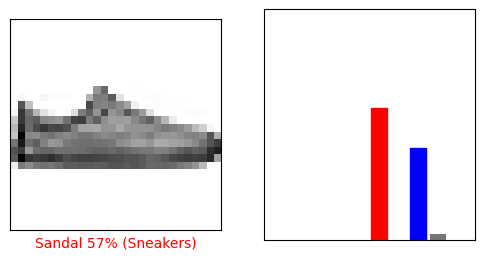

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_image)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

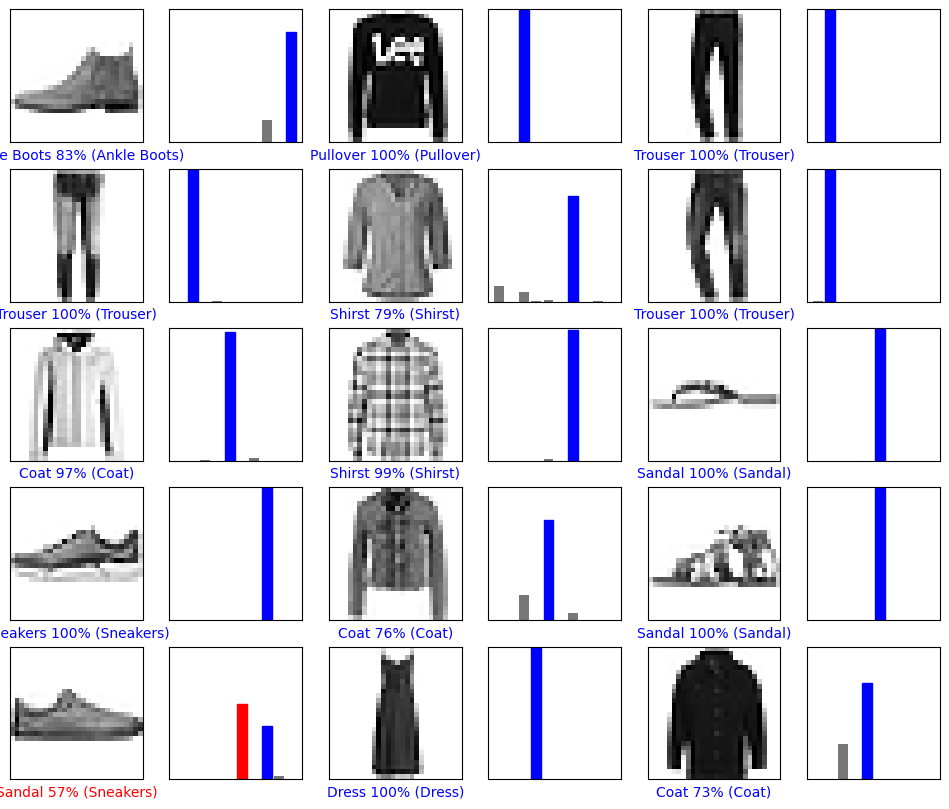

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, test_labels, test_image)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i,predictions, test_labels)
plt.show()

In [26]:
img = test_image[0]

In [27]:
img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
img = (np.expand_dims(img,0))

In [29]:
print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 51ms/step
[[0.08713756 0.08713735 0.08713735 0.08713734 0.0871374  0.08732545
  0.08713744 0.10324225 0.08714748 0.1994604 ]]


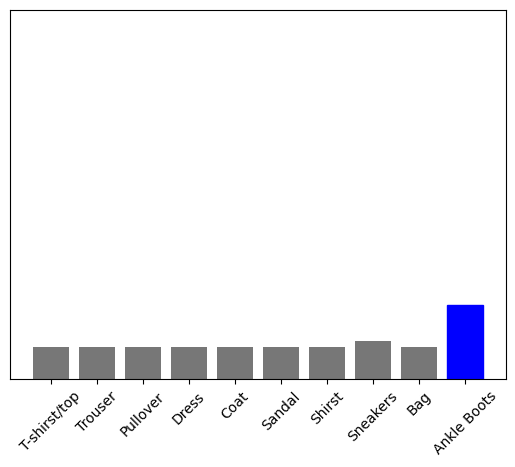

In [31]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation=45)

# 이미지를 위한 인공신경망
## (합성곱 신경망 구성요소)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [34]:
train_scaled = train_input.reshape(-1, 28,28,1) / 255.0

In [35]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [36]:
train_scaled.shape

(48000, 28, 28, 1)

In [37]:
val_scaled.shape

(12000, 28, 28, 1)

In [38]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',
          padding='same', input_shape=(28,28,1)))

In [39]:
model.add(keras.layers.MaxPool2D(2,2))

In [40]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
          padding='same'))
model.add(keras.layers.MaxPool2D(2,2))

In [41]:
model.add(keras.layers.Flatten())

In [42]:
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))#과대적합을 막기 위해 사용하는 드롭아웃
model.add(keras.layers.Dense(10, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

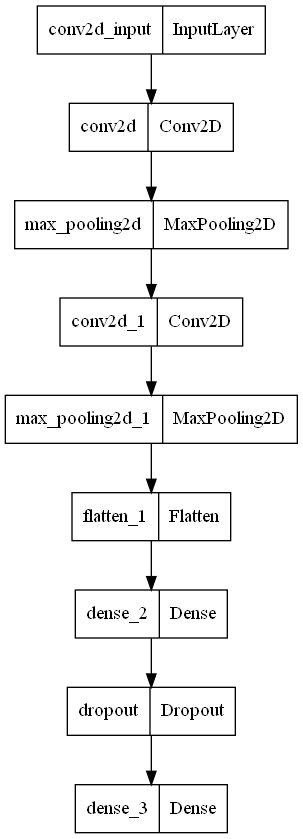

In [44]:
keras.utils.plot_model(model)

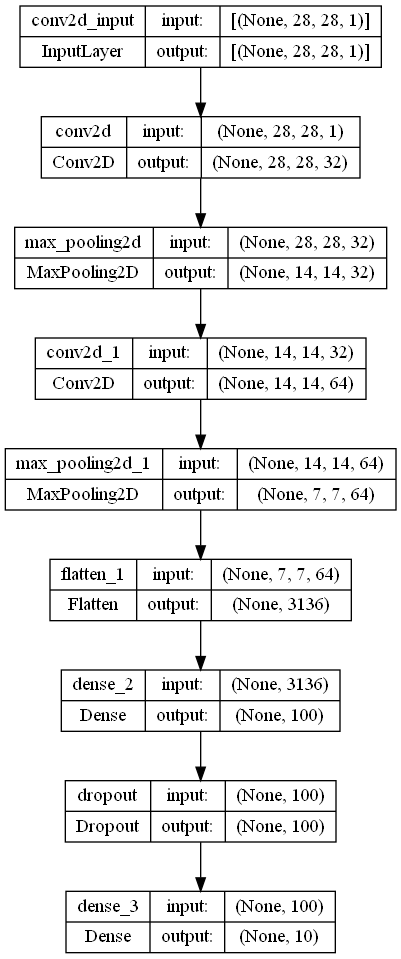

In [45]:
keras.utils.plot_model(model, show_shapes = True)

In [46]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [47]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)

In [48]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 12s 7ms/step - loss: 0.5228 - accuracy: 0.8125 - val_loss: 0.3295 - val_accuracy: 0.8811
Epoch 2/20
  24/1500 [..............................] - ETA: 10s - loss: 0.3445 - accuracy: 0.8815

C:\Users\kimtp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 11s 7ms/step - loss: 0.3505 - accuracy: 0.8728 - val_loss: 0.2835 - val_accuracy: 0.8937
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2985 - accuracy: 0.8920 - val_loss: 0.2481 - val_accuracy: 0.9078
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2661 - accuracy: 0.9040 - val_loss: 0.2372 - val_accuracy: 0.9124
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2412 - accuracy: 0.9125 - val_loss: 0.2381 - val_accuracy: 0.9154
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2197 - accuracy: 0.9197 - val_loss: 0.2202 - val_accuracy: 0.9181
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2027 - accuracy: 0.9254 - val_loss: 0.2251 - val_accuracy: 0.9199
Epoch 8/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1880 - accuracy: 0.9296 - val_loss: 0.2204 - val_accuracy: 0.9